## About The Data

The data we'll be using comes from [kaggle](https://www.kaggle.com/), and contains the following car attributes:

- car_ID
- symboling
- CarName
- fueltype
- aspiration
- doornumber
- carbody
- drivewheel
- enginelocation
- wheelbase
- carlength
- carwidth
- carheight
- curbweight
- enginetype
- cylindernumber
- enginesize
- fuelsystem
- boreratio
- stroke
- compressionratio
- horsepower
- peakrpm
- citympg
- highwaympg
- price


## Problem Statement
You are required to model the price of cars with the available independent variables. It will be used by your management team to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In general, your company would like for you to answer the followi

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a carng:

## Part 1. Reading and Understanding the Data

Begin by importing some necessary libraries that you'll be using to explore the data.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

Import the data using pandas and save into a variable named cars_df. Then display the first 5 rows.

In [3]:
# Loading the dataset
cars_df = pd.read_csv('car_data.csv')

# Displaying the first 5 rows
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_company_counts = cars_df['CarName'].value_counts()
print(car_company_counts)

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64


Print some basic statistics of your data.

In [5]:
# Gerneral stats
general_info = cars_df.describe()
general_info.head(n=100)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Print some general information about your data using pandas.

In [7]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

By looking at our previous output, are there any missing values in this dataset? How do we know?

Based on the output of the describe() method, there are no missing values in the dataset as all columns show 205 non-null entries. 

## Part 2. Data Cleaning and Preparation


Instead of using car names, let's extract company names to see how the companies are distributed. Use the CarName column to create a new column in cars_df called 'car_company' that tells us which company the car belongs to. Once you've accomplished this, display all of the unique company names in our dataset.

Hint: Every carName value has the car company name placed in front of it, so you can parse it out. Also lowercase every company name to ensure that we don't double count something like bmw with BMW.

In [8]:
# Extract company names and create a new column
cars_df['car_company'] = cars_df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Display unique company names
print('The The unique companies in our dataset are:')
print(cars_df['car_company'].unique())

The The unique companies in our dataset are:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


Notice how there are some typos in the data. 'toyouta' should be 'toyota', 'porcshce' should be 'porsche', 'maxda' should be 'mazda', 'vokswagen' should be 'volkswagen', and 'vw' should be 'volkswagen'. Use Pandas to make these name corrections and display the unique company names again. 

In [9]:
# Replace misspelled company names
cars_df['car_company'] = cars_df['car_company'].replace({
                        "toyouta" : "toyota", 
                        "porcshce" : "porsche", 
                        "maxda" : "mazda", 
                        "vokswagen" : "volkswagen",
                        "vw" : "volkswagen"})

# Transform company names to lowercase and take the first word
cars_df['car_company'] = cars_df['car_company'].apply(lambda x: x.split(' ')[0].lower())

# Display unique company names
print('The unique companies in our dataset are:')
print(cars_df['car_company'].unique())


The unique companies in our dataset are:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


## Part 3. Visualising Categorical Data

- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel


Create the following plots

1. A plot of the unique company names on the x-axis, and the value counts on the y-axis.
2. A plot of the unique car bodys on the x-axis and value counts on the y-axis.

<function matplotlib.pyplot.show(close=None, block=None)>

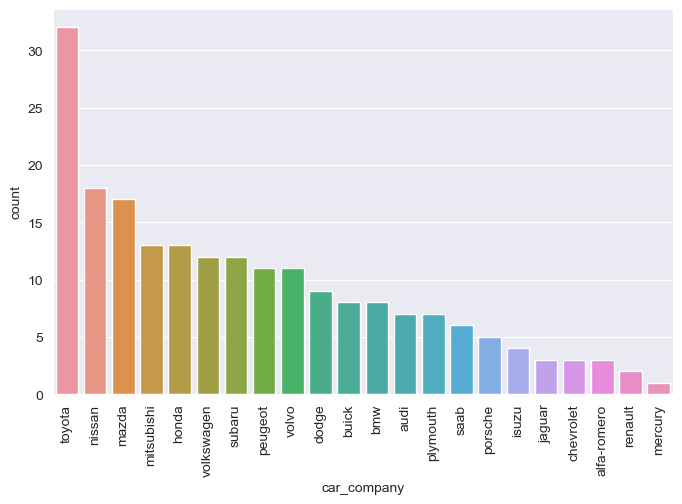

In [10]:
sns.countplot(x = cars_df['car_company'], data = cars_df, order = cars_df['car_company'].value_counts().index)
plt.xticks(rotation = 90)
plt.show

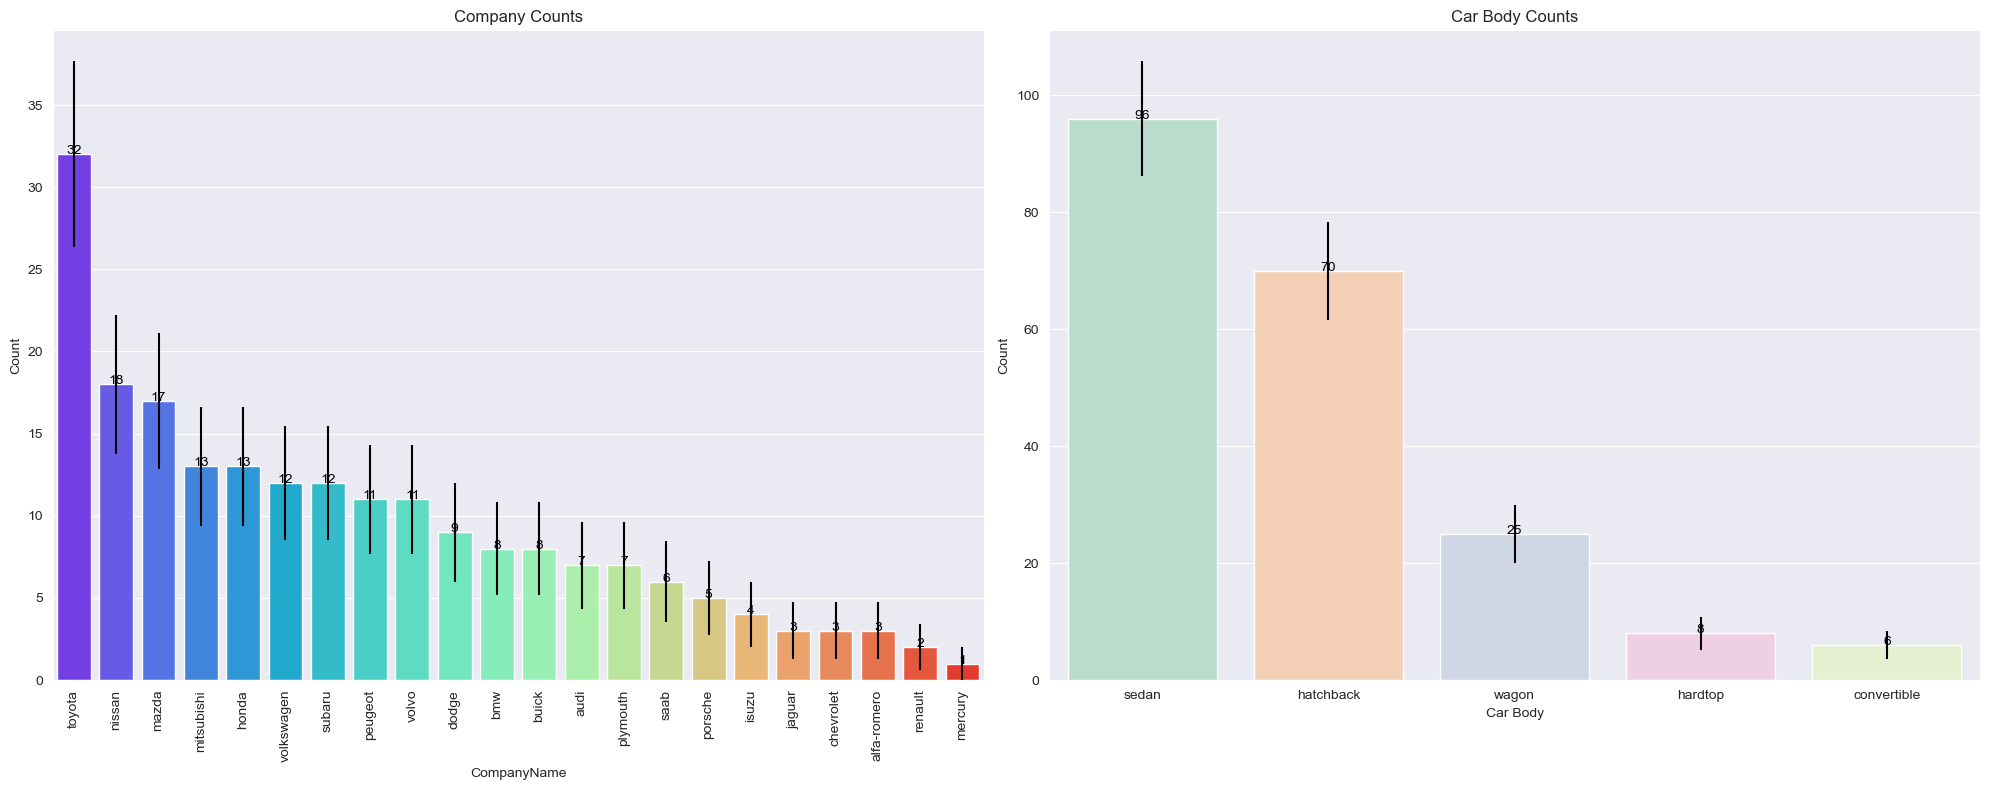

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Company Counts
company_counts = cars_df['car_company'].value_counts().sort_values(ascending=False)
company_means = company_counts.values
company_std = np.sqrt(company_counts.values)  # Standard deviation as error
sns.barplot(ax=axes[0], x=company_counts.index, y=company_means, palette='rainbow', yerr=company_std)

# Adding text labels on each bar
for i, (company, count) in enumerate(company_counts.items()):
    axes[0].text(i, count, str(count), color='black', ha="center")

axes[0].set_xlabel('CompanyName')
axes[0].set_ylabel('Count')
axes[0].set_title('Company Counts')
axes[0].tick_params(axis='x', rotation=90)

# Plot 2: Car Body Counts
car_body_counts = cars_df['carbody'].value_counts().sort_values(ascending=False)
car_body_means = car_body_counts.values
car_body_std = np.sqrt(car_body_counts.values)  # Standard deviation as error
sns.barplot(ax=axes[1], x=car_body_counts.index, y=car_body_means, palette='Pastel2', yerr=car_body_std)

# Adding text labels on each bar
for i, (car_body, count) in enumerate(car_body_counts.items()):
    axes[1].text(i, count, str(count), color='black', ha="center")

axes[1].set_xlabel('Car Body')
axes[1].set_ylabel('Count')
axes[1].set_title('Car Body Counts')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


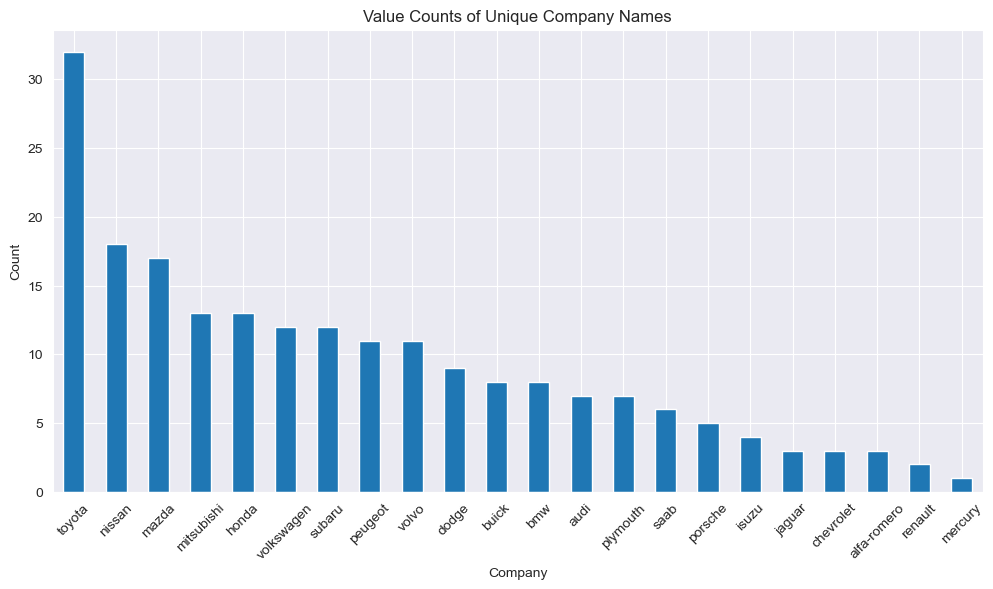

In [13]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

# Plotting the unique company names on the x-axis, and the value counts on the y-axis
plt.figure(figsize=(12, 6))
cars_df['car_company'].value_counts().plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Value Counts of Unique Company Names')
plt.xticks(rotation=45)
plt.show()


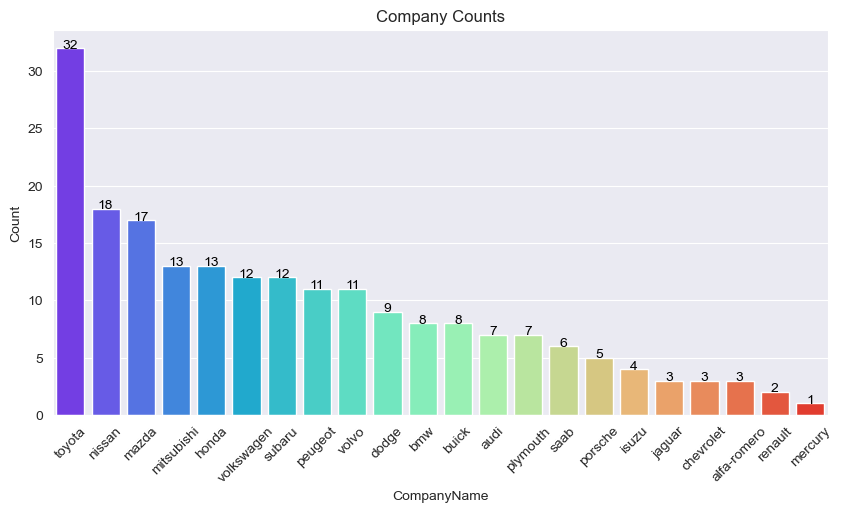

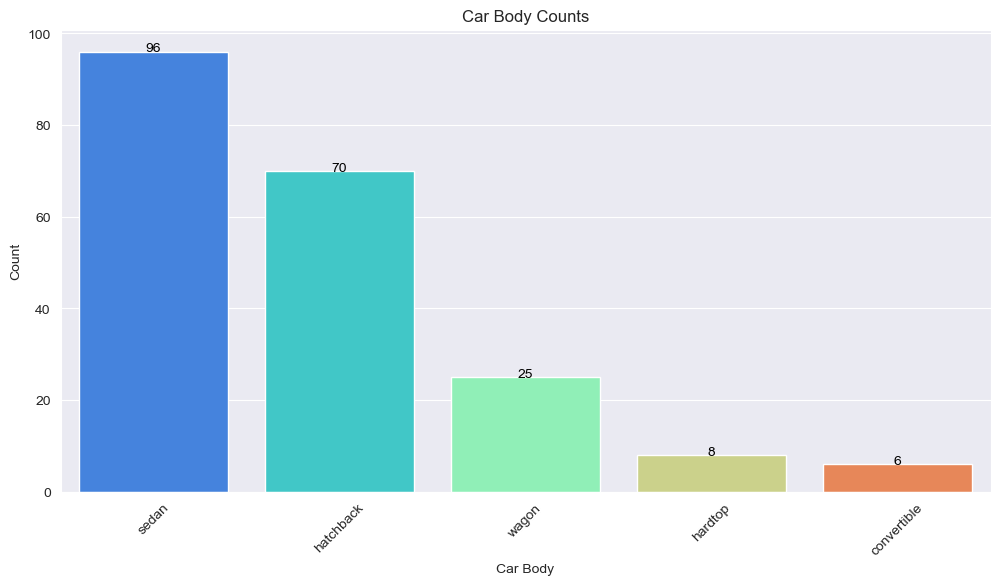

In [14]:
# Plotting the unique company names on the x-axis, and the value counts on the y-axis
plt.figure(figsize=(10, 5))
company_counts = cars_df['car_company'].value_counts().sort_values(ascending=False)
barplot = sns.barplot(x=company_counts.index, y=company_counts.values, palette='rainbow')

# Adding text labels on each bar
for i, (company, count) in enumerate(company_counts.items()):
    barplot.text(i, count, str(count), color='black', ha="center")

plt.xlabel('CompanyName')
plt.ylabel('Count')
plt.title('Company Counts')
plt.xticks(rotation=45)
plt.show()

# Plotting the unique car bodys on the x-axis and value counts on the y-axis
plt.figure(figsize=(12, 6))
car_body_counts = cars_df['carbody'].value_counts().sort_values(ascending=False)
barplot = sns.barplot(x=car_body_counts.index, y=car_body_counts.values, palette='rainbow')

# Adding text labels on each bar
for i, (car_body, count) in enumerate(car_body_counts.items()):
    barplot.text(i, count, str(count), color='black', ha="center")

plt.xlabel('Car Body')
plt.ylabel('Count')
plt.title('Car Body Counts')
plt.xticks(rotation=45)
plt.show()


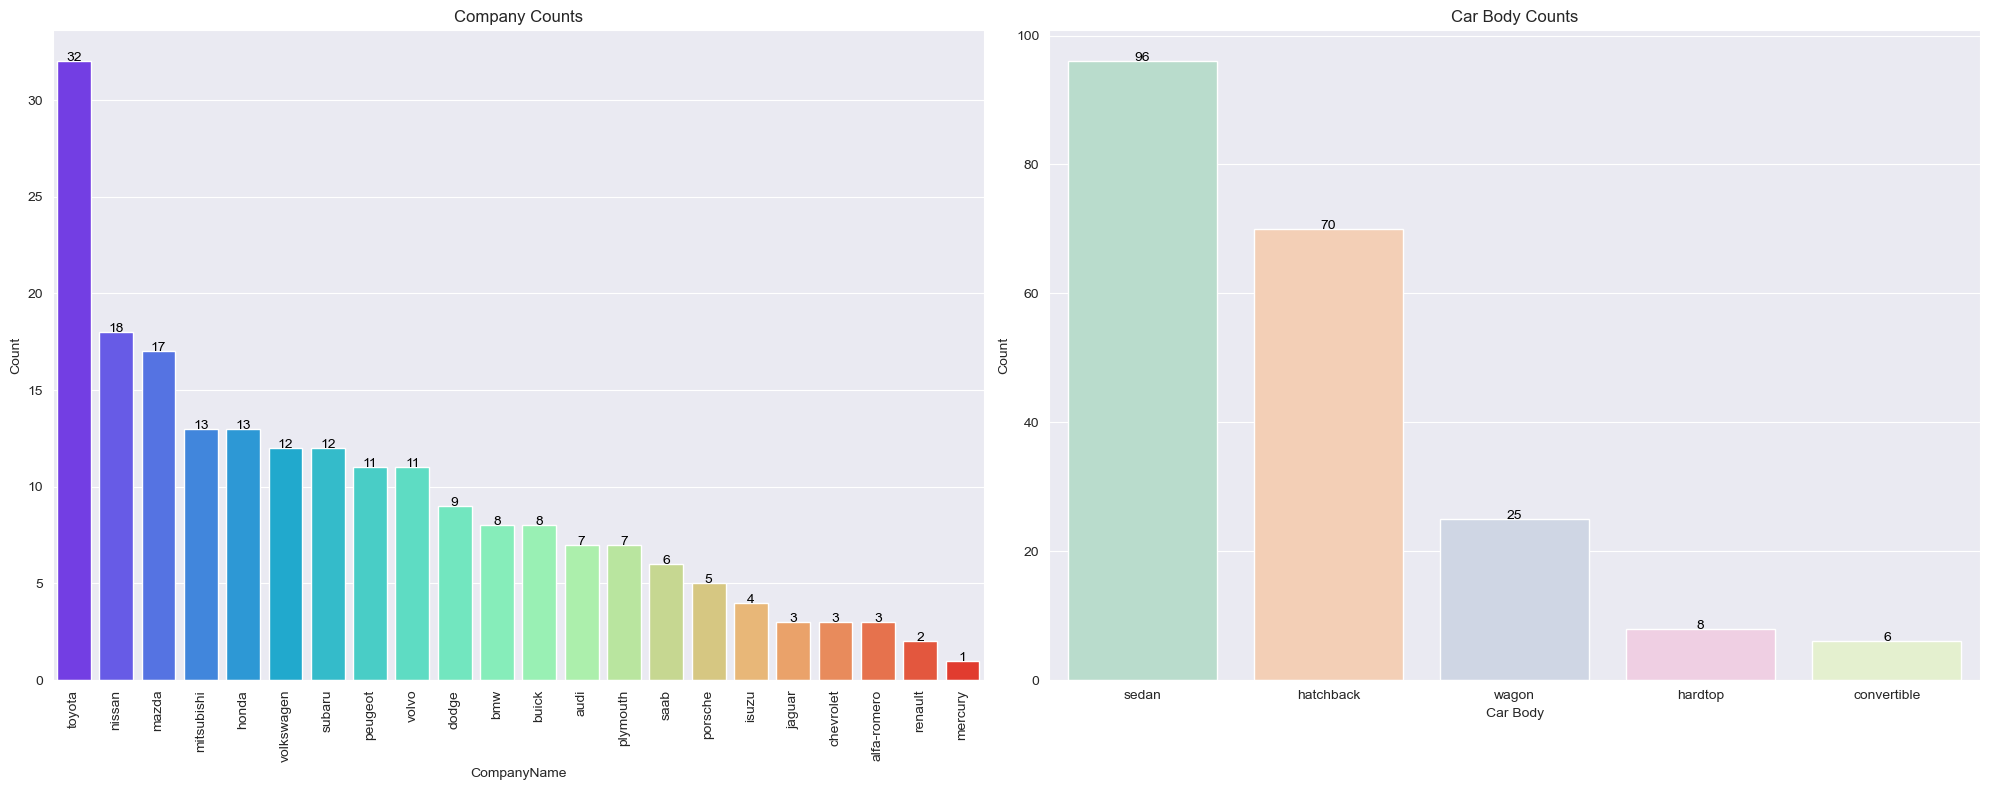

In [15]:
# Creating subplots

# plot 1 
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the unique company names on the x-axis, and the value counts on the y-axis
company_counts = cars_df['car_company'].value_counts().sort_values(ascending=False)
sns.barplot(ax=axes[0], x=company_counts.index, y=company_counts.values, palette='rainbow')

# Adding text labels on each bar
for i, (company, count) in enumerate(company_counts.items()):
    axes[0].text(i, count, str(count), color='black', ha="center")

axes[0].set_xlabel('CompanyName')
axes[0].set_ylabel('Count')
axes[0].set_title('Company Counts')
axes[0].tick_params(axis='x', rotation=90) # for each car company name 




# plot 2 
# Plotting the unique car bodys on the x-axis and value counts on the y-axis
car_body_counts = cars_df['carbody'].value_counts().sort_values(ascending=False)
sns.barplot(ax=axes[1], x=car_body_counts.index, y=car_body_counts.values, palette='Pastel2')

# Adding text labels on each bar
for i, (car_body, count) in enumerate(car_body_counts.items()):
    axes[1].text(i, count, str(count), color='black', ha="center")

axes[1].set_xlabel('Car Body')
axes[1].set_ylabel('Count')
axes[1].set_title('Car Body Counts')
axes[1].tick_params(axis='x', rotation= False) # for the name for each body type

plt.tight_layout()
plt.show()

After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of the unique company names on the x-axis, and that companies average price on the y-axis.
2. A plot of the unique car bodys on the x-axis and that car body's average price on the y-axis.

/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_9224/4114600329.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='car_company', y='mean', data=company_stats_sorted, ci='sd')


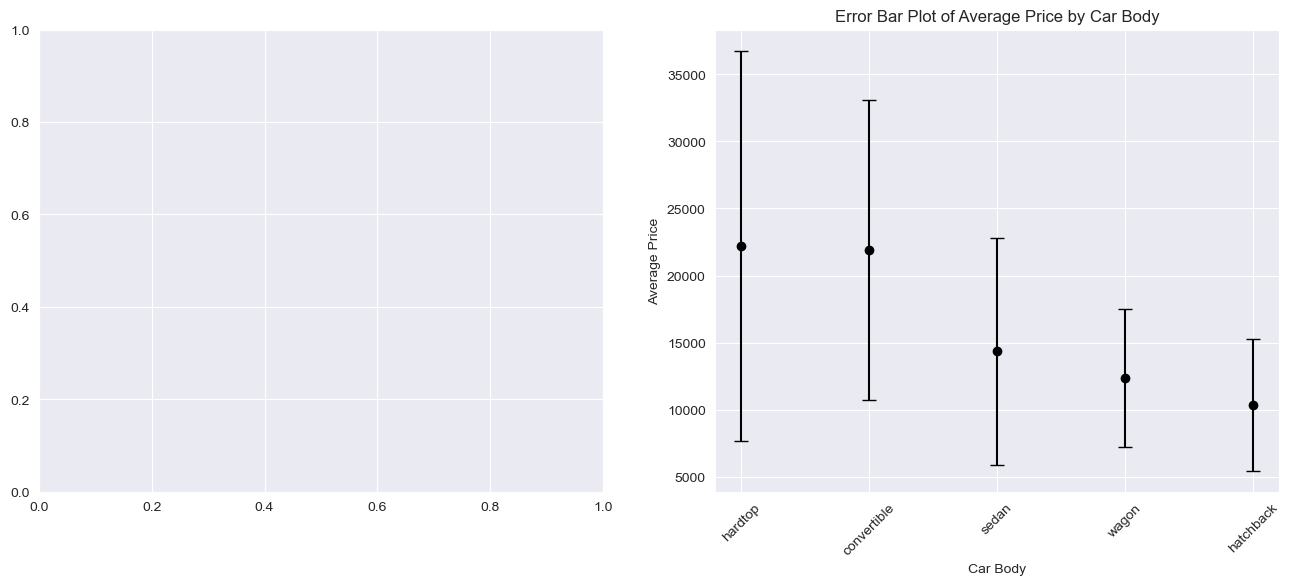

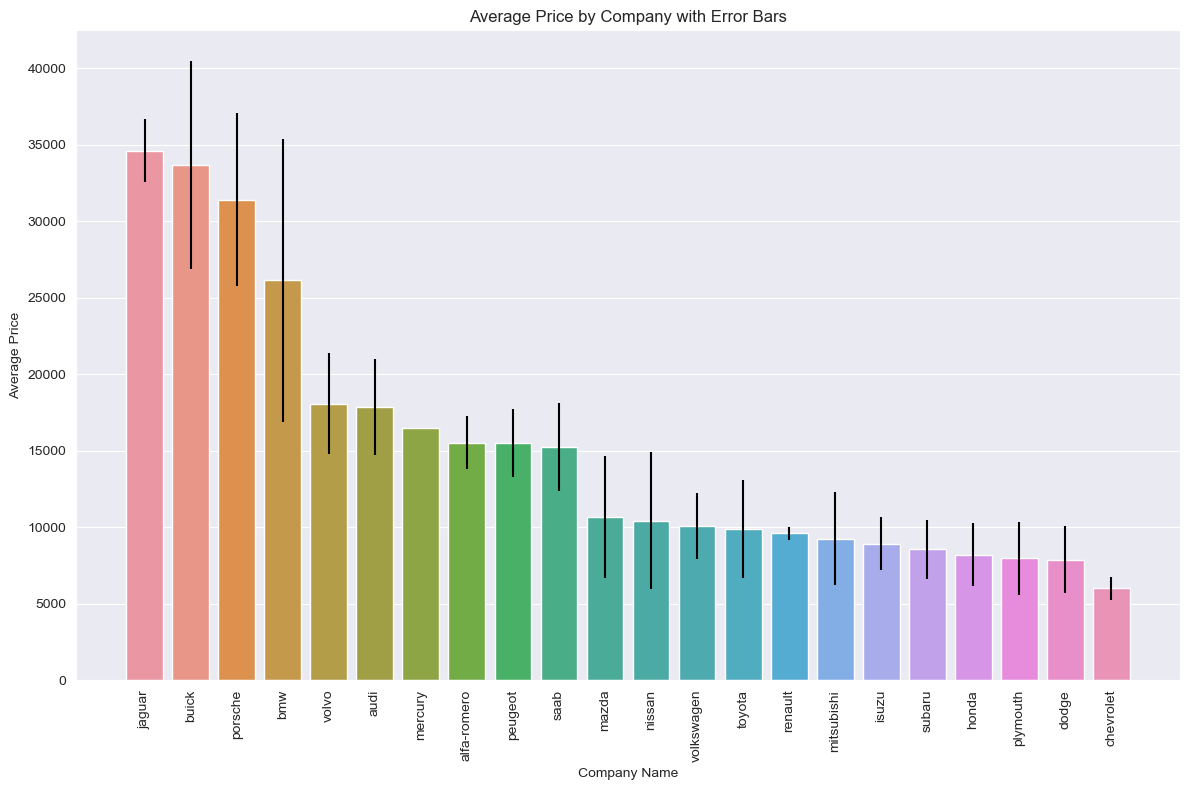

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset


# Group by company name and calculate average price and standard deviation
company_stats = cars_df.groupby('carbody')['price'].agg(['mean', 'std']).reset_index()

# Sort the DataFrame by average price in descending order
company_stats_sorted = company_stats.sort_values(by='mean', ascending=False)

# Group by car body and calculate average price and standard deviation
carbody_stats = cars_df.groupby('carbody')['price'].agg(['mean', 'std']).reset_index()

# Sort the DataFrame by average price in descending order
carbody_stats_sorted = carbody_stats.sort_values(by='mean', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))





# Group by company name and calculate average price and standard deviation
company_stats = cars_df.groupby('car_company')['price'].agg(['mean', 'std']).reset_index()

# Sort the DataFrame by average price in descending order
company_stats_sorted = company_stats.sort_values(by='mean', ascending=False)

# Create the bar plot with error bars
plt.figure(figsize=(12, 8))
sns.barplot(x='car_company', y='mean', data=company_stats_sorted, ci='sd')

# Add error bars (its all in the cap size! (: )
plt.errorbar(x=company_stats_sorted['car_company'], y=company_stats_sorted['mean'], yerr=company_stats_sorted['std'], fmt='none', color='black', capsize=0, capthick=1)

plt.xlabel('Company Name')
plt.ylabel('Average Price')
plt.title('Average Price by Company with Error Bars')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability







# Plot error bar plot for car body data
axes[1].errorbar(x=carbody_stats_sorted['carbody'], y=carbody_stats_sorted['mean'], yerr=carbody_stats_sorted['std'], fmt='o', color='black', capsize=5, capthick=1)
axes[1].set_xlabel('Car Body')
axes[1].set_ylabel('Average Price')
axes[1].set_title('Error Bar Plot of Average Price by Car Body')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


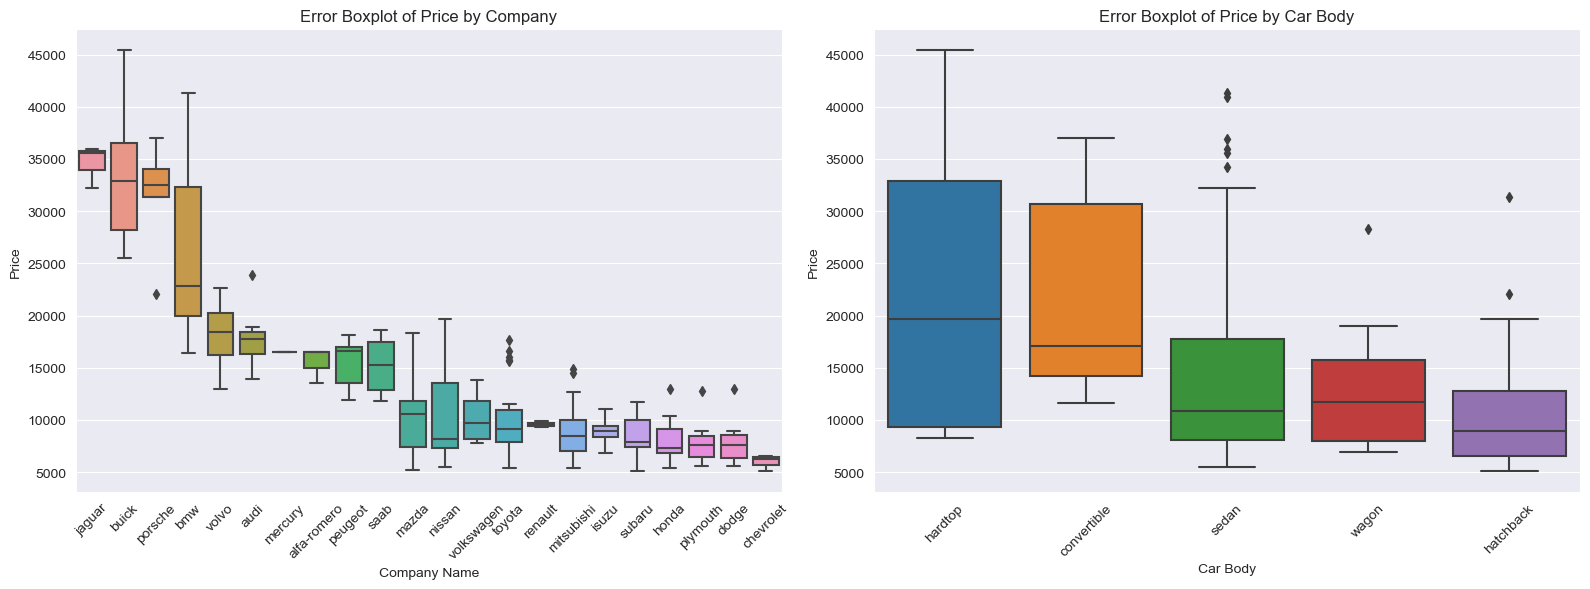

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by company name and calculate average price and standard deviation
company_stats = cars_df.groupby('car_company')['price'].agg(['mean', 'std']).reset_index()

# Sort the DataFrame by average price in descending order
company_stats_sorted = company_stats.sort_values(by='mean', ascending=False)

# Group by car body and calculate average price and standard deviation
carbody_stats = cars_df.groupby('carbody')['price'].agg(['mean', 'std']).reset_index()

# Sort the DataFrame by average price in descending order
carbody_stats_sorted = carbody_stats.sort_values(by='mean', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot error boxplot for company data
sns.boxplot(ax=axes[0], x='car_company', y='price', data=cars_df, order=company_stats_sorted['car_company'])
axes[0].set_xlabel('Company Name')
axes[0].set_ylabel('Price')
axes[0].set_title('Error Boxplot of Price by Company')
axes[0].tick_params(axis='x', rotation=45)

# Plot error boxplot for car body data
sns.boxplot(ax=axes[1], x='carbody', y='price', data=cars_df, order=carbody_stats_sorted['carbody'])
axes[1].set_xlabel('Car Body')
axes[1].set_ylabel('Price')
axes[1].set_title('Error Boxplot of Price by Car Body')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


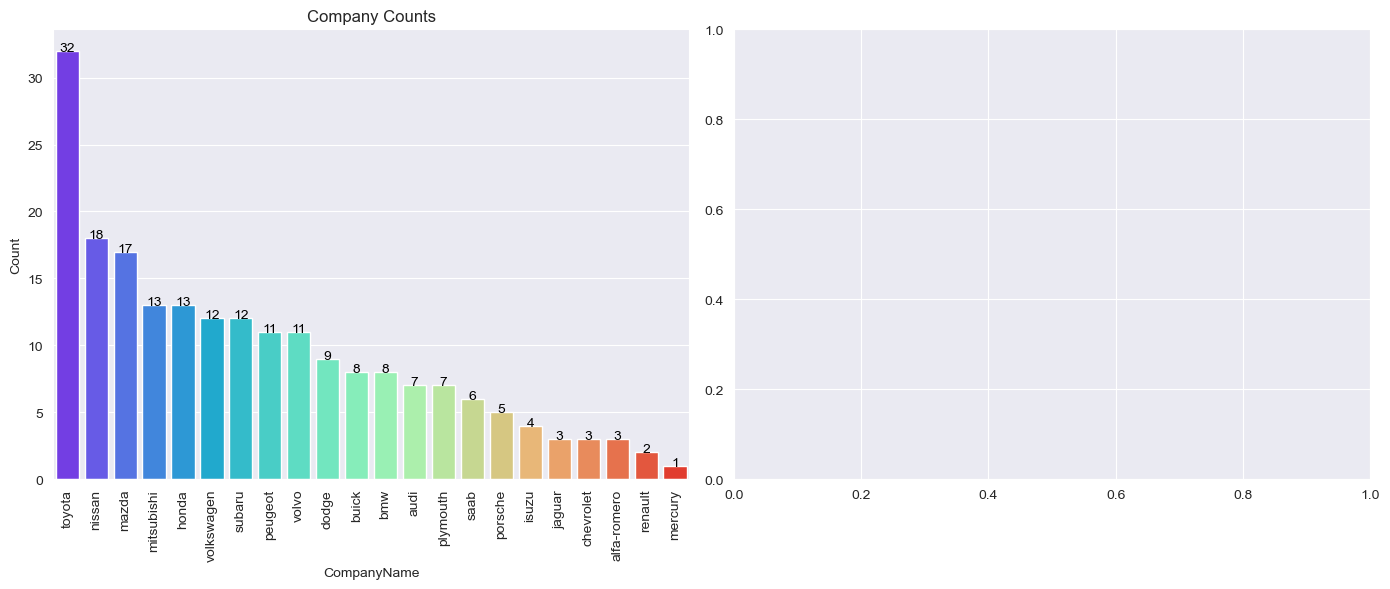

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cars_df, company_prices, and body_prices are already defined

# Group by company name and calculate count
company_counts = cars_df['car_company'].value_counts().reset_index()
company_counts.columns = ['CompanyName', 'Count']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Company Counts
sns.barplot(ax=axes[0], x='CompanyName', y='Count', data=company_counts, palette='rainbow')

# Adding text labels on each bar
for i, (company, count) in enumerate(zip(company_counts['CompanyName'], company_counts['Count'])):
    axes[0].text(i, count, str(count), color='black', ha="center")

axes[0].set_xlabel('CompanyName')
axes[0].set_ylabel('Count')
axes[0].set_title('Company Counts')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


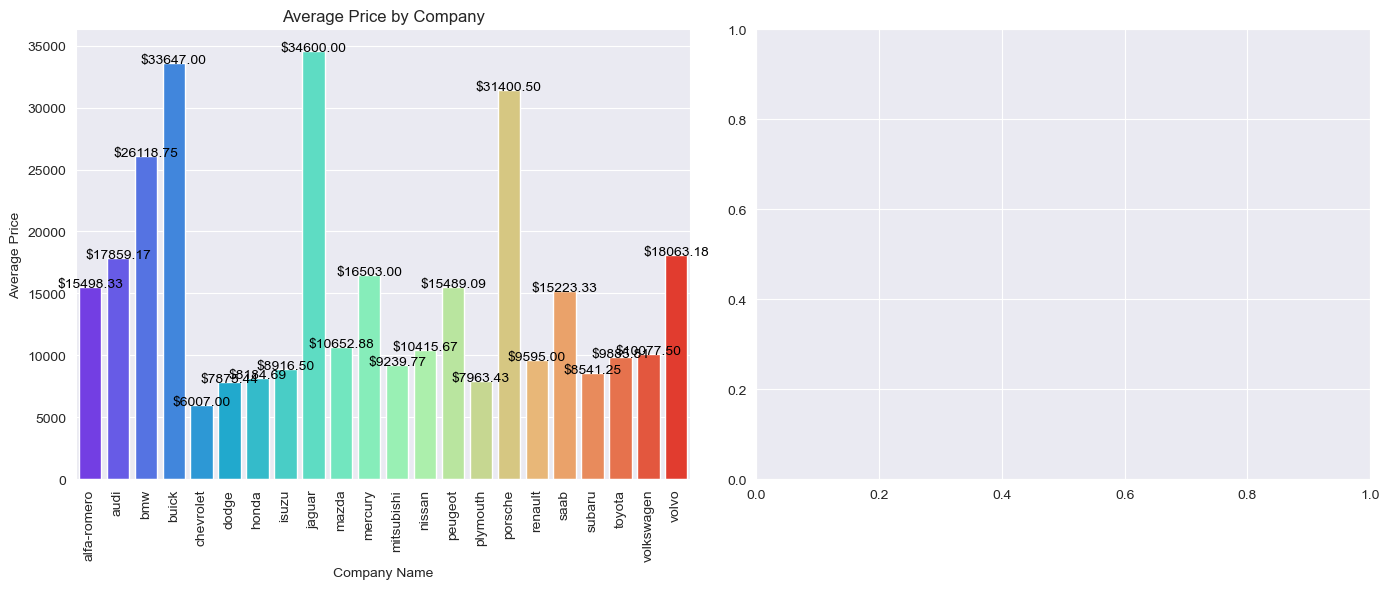

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cars_df, company_prices, and body_prices are already defined

# Group by company name and calculate average price
company_prices = cars_df.groupby('car_company')['price'].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Average Prices by Company
sns.barplot(ax=axes[0], x='car_company', y='price', data=company_prices, palette='rainbow')

# Adding text labels on each bar
for i, (company, price) in enumerate(zip(company_prices['car_company'], company_prices['price'])):
    axes[0].text(i, price, f"${price:.2f}", color='black', ha="center")

axes[0].set_xlabel('Company Name')
axes[0].set_ylabel('Average Price')
axes[0].set_title('Average Price by Company')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


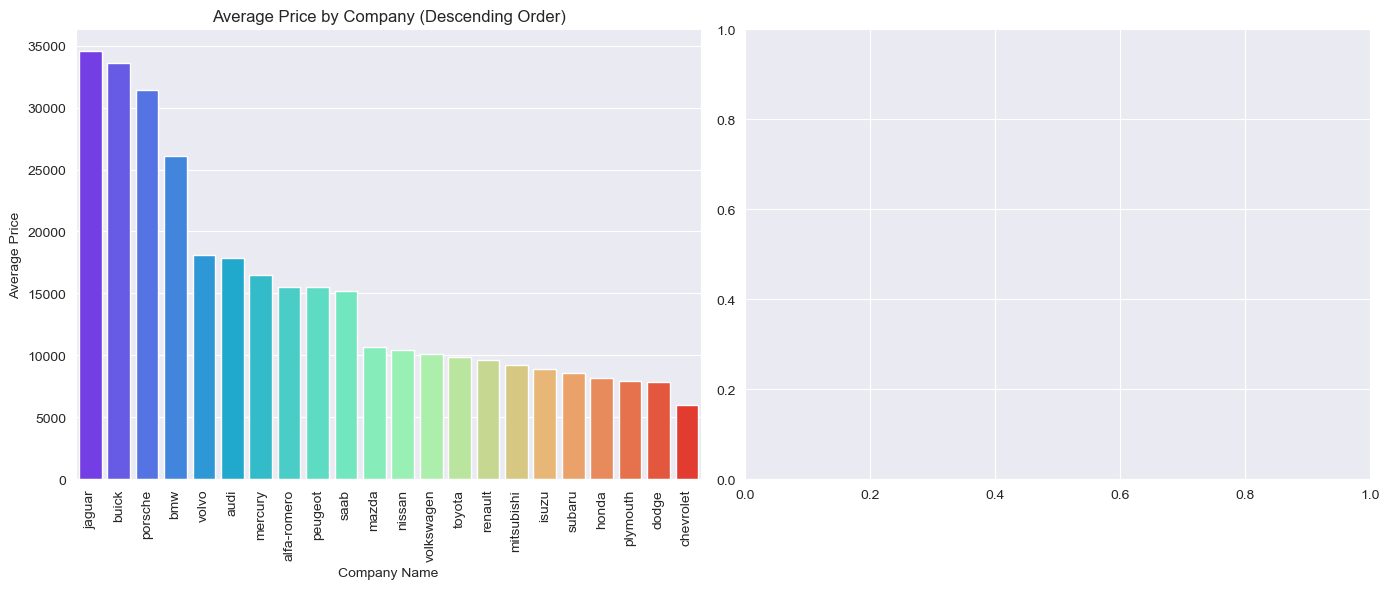

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cars_df, company_prices, and body_prices are already defined

# Group by company name and calculate average price
company_prices = cars_df.groupby('car_company')['price'].mean().reset_index()

# Sort the DataFrame by average price in descending order
company_prices_sorted = company_prices.sort_values(by='price', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Average Prices by Company
sns.barplot(ax=axes[0], x='car_company', y='price', data=company_prices_sorted, palette='rainbow')

# # Adding text labels on each bar
# for i, (company, price) in enumerate(zip(company_prices_sorted['car_company'], company_prices_sorted['price'])):
#     axes[0].text(i, price, f"${price:.2f}", color='black', ha="center")

axes[0].set_xlabel('Company Name')
axes[0].set_ylabel('Average Price')
axes[0].set_title('Average Price by Company (Descending Order)')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


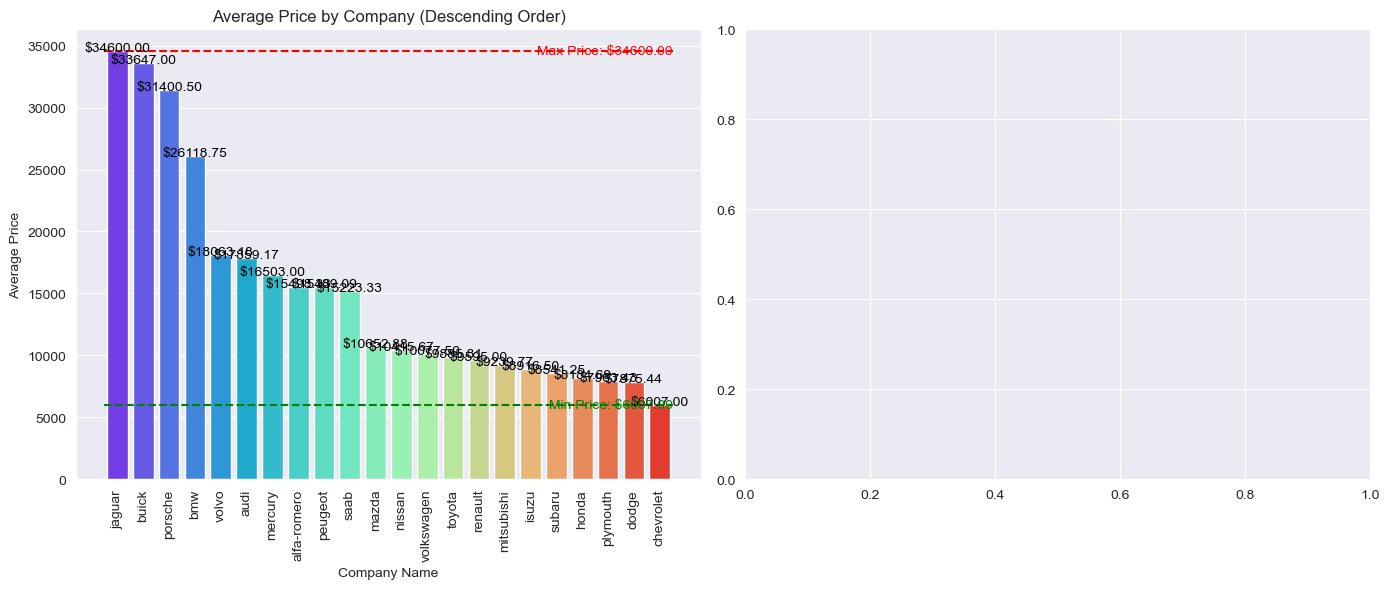

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cars_df, company_prices, and body_prices are already defined

# Group by company name and calculate average price
company_prices = cars_df.groupby('car_company')['price'].mean().reset_index()

# Sort the DataFrame by average price in descending order
company_prices_sorted = company_prices.sort_values(by='price', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Average Prices by Company
sns.barplot(ax=axes[0], x='car_company', y='price', data=company_prices_sorted, palette='rainbow')

# Adding text labels on each bar
for i, (company, price) in enumerate(zip(company_prices_sorted['car_company'], company_prices_sorted['price'])):
    axes[0].text(i, price, f"${price:.2f}", color='black', ha="center")

# Adding a line sticking out of each bar
max_price = company_prices_sorted['price'].max()
min_price = company_prices_sorted['price'].min()
line_length = max_price * 0.05  # Adjust the length of the line

axes[0].plot([-0.5, len(company_prices_sorted) - 0.5], [max_price, max_price], color='red', linestyle='--')
axes[0].plot([-0.5, len(company_prices_sorted) - 0.5], [min_price, min_price], color='green', linestyle='--')

axes[0].text(len(company_prices_sorted) - 0.5, max_price, f"Max Price: ${max_price:.2f}", color='red', ha="right", va="center")
axes[0].text(len(company_prices_sorted) - 0.5, min_price, f"Min Price: ${min_price:.2f}", color='green', ha="right", va="center")

axes[0].set_xlabel('Company Name')
axes[0].set_ylabel('Average Price')
axes[0].set_title('Average Price by Company (Descending Order)')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


/var/folders/23/j9wjdnd957q0xnpzv2x0w7s80000gn/T/ipykernel_8216/1009254888.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[0], x='car_company', y='price', data=company_prices_sorted, palette='rainbow', ci='sd')


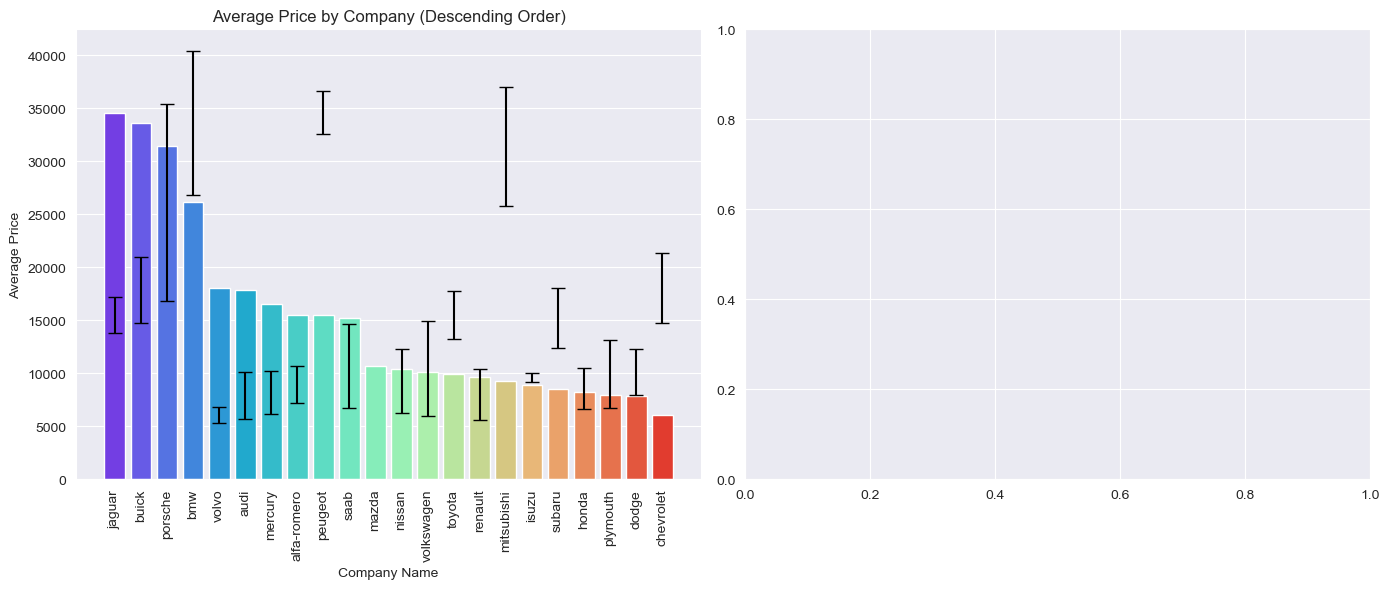

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cars_df, company_prices, and body_prices are already defined

# Group by company name and calculate average price
company_prices = cars_df.groupby('car_company')['price'].mean().reset_index()

# Sort the DataFrame by average price in descending order
company_prices_sorted = company_prices.sort_values(by='price', ascending=False) 

# Calculate standard deviation
company_std = cars_df.groupby('car_company')['price'].std().reset_index()

# Sort the standard deviation DataFrame to align with the sorted average prices DataFrame
company_std_sorted = company_std.reindex(company_prices_sorted.index)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Average Prices by Company with error bars based on standard deviation
sns.barplot(ax=axes[0], x='car_company', y='price', data=company_prices_sorted, palette='rainbow', ci='sd')
# sns.barplot(x = "car_compay", y = "price", data = company_prices, estimator = np.mean, ci = 85, capsize = .2, color = 'lightblue')



# Adding standard deviation error bars
axes[0].errorbar(x=company_prices_sorted.index, y=company_prices_sorted['price'], yerr=company_std_sorted['price'], fmt='none', color='black', capsize=5, capthick=1)

axes[0].set_xlabel('Company Name')
axes[0].set_ylabel('Average Price')
axes[0].set_title('Average Price by Company (Descending Order)')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cars_df is already defined

# Group by company name and calculate average price and standard deviation
company_stats = cars_df.groupby('car_company')['price'].agg(['mean', 'std']).reset_index()

# Sort the DataFrame by average price in descending order
company_stats_sorted = company_stats.sort_values(by='mean', ascending=False)

# Create the bar plot with error bars
plt.figure(figsize=(12, 8))
sns.barplot(x='car_company', y='mean', data=company_stats_sorted, ci='sd')

# Add error bars (its all in the cap size! (: )
plt.errorbar(x=company_stats_sorted['car_company'], y=company_stats_sorted['mean'], yerr=company_stats_sorted['std'], fmt='none', color='black', capsize=0, capthick=1)

plt.xlabel('Company Name')
plt.ylabel('Average Price')
plt.title('Average Price by Company with Error Bars')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


KeyError: 'car_company'

In [86]:
# guide for error bar plots!

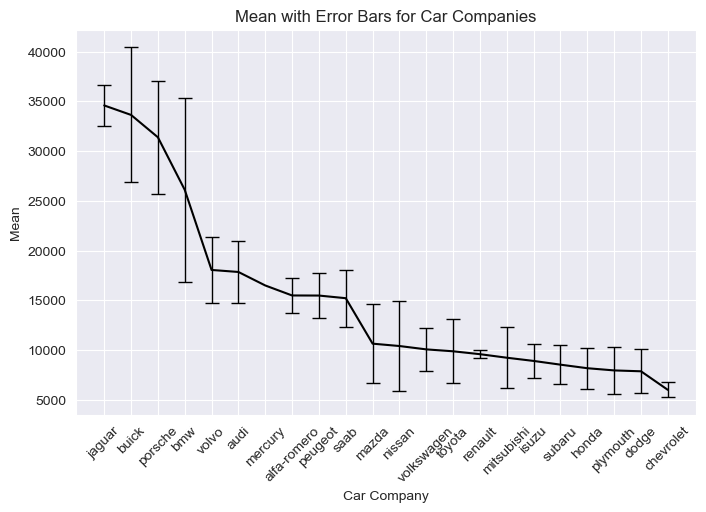

In [87]:
import matplotlib.pyplot as plt

plt.errorbar(
    x=company_stats_sorted['car_company'], 
    y=company_stats_sorted['mean'], 
    yerr=company_stats_sorted['std'], 
    fmt='',                    # No markers, only error bars
    color='black',             # Color of error bars
    ecolor='black',            # Color of error bars
    linestyle='-',             # No connecting lines
    capsize=5,                 # Length of error bar caps
    capthick=1,                # Thickness of error bar caps
    elinewidth=1               # Thickness of error bar lines
)

plt.xlabel('Car Company')
plt.ylabel('Mean')
plt.title('Mean with Error Bars for Car Companies')
plt.xticks(rotation=45)       # Rotate x-axis labels for better readability
plt.grid(True)                # Show grid

plt.show()


After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of the unique symboling values on the x-axis, and the value counts on the y-axis.
2. A box plot of the unique symboling values on the x-axis and price on the y-axis.

In [150]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of enginetype on the x-axis, and the value counts on the y-axis.
2. A box plot of enginetype on the x-axis and price on the y-axis.

In [154]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

Create the following plots
1. A plot of cylindernumber on the x-axis, and the value counts on the y-axis.
2. 
A box plot of cylindernumber on the x-axis and price on the y-axis.is.

In [157]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of fuelsystem on the x-axis, and the value counts on the y-axis.
2. A box plot of fuelsystem on the x-axis and price on the y-axis.

In [161]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of drivewheel on the x-axis, and the value counts on the y-axis.
2. A box plot of drivewheel on the x-axis and price on the y-axis.

In [165]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of enginelocation on the x-axis, and the value counts on the y-axis.
2. A box plot of enginelocation on the x-axis and price on the y-axis.

In [169]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of fueltype on the x-axis, and the value counts on the y-axis.
2. A box plot of fueltype on the x-axis and price on the y-axis.

In [173]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of doornumber on the x-axis, and the value counts on the y-axis.
2. A box plot of doornumber on the x-axis and price on the y-axis.

In [177]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create the following plots

1. A plot of aspiration on the x-axis, and the value counts on the y-axis.
2. A box plot of aspiration on the x-axis and price on the y-axis.

In [181]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

## Part 4. Visualising Numerical Data

price
carlength
carwidth
carheight
curbweight
enginesize
boreratio
stroke
compressionratio
horsepower
peakrpm
wheelbase
citympg
highwaympg

Create the following plots

1. A plot showing the price distribution
2. A box plot of price

In [187]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Let's try and get an idea of how the car attributes related to a car's size are related to price.

Create the following plots

1. A scatter plot of carlength vs price.
2. A scatter plot of carwidth vs price.
3. A scatter plot of carheight vs price.
4. A scatter plot of carweight vs price.
 ce.rice.

In [192]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 4 plots, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create scatter plots of the remaining numerical variables to see their relationship with price.

Create the following plots

1. A scatter plot of enginesize vs price.
2. A scatter plot of boreratio vs price.
3. A scatter plot of stroke vs price.
4. A scatter plot of compressionratio vs price.
5. A scatter plot of horsepower vs price.
6. A scatter plot of peakrpm vs price.
7. A scatter plot of wheelbase vs price.
8. A scatter plot of citympg vs price.
9. A scatter plot of highwaympg vs price.
pg vs price.

In [196]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating the plots above, describe what we can conclude from them.

### WRITE YOUR ANSWER HERE

Create a heatmap or correlation matrix to inspect the correlations in our dataset.

In [200]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating the plot above, what can you conclude? Are there any features you can combine to form a new one? If so, try it out and see how it affects your final results in the end.

### WRITE YOUR ANSWER HERE

For example, citympg and highwaympg can be combined into a single feature. Create a new column called 'fuel_economy' that's a combination of the 2.

In [204]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After visual analysis, which variables do you believe to be significant when predicting price, and why?

### WRITE YOUR ANSWER HERE

## Part 5. Data Pre-Processing

Perform the following

1. Convert your categorical variables into dummy variables
2. Scale the data using a scaler of your choice
3. Split your data into a training and testing set, with test size of 0.30


In [209]:
### WRITE YOUR CODE HERE ###

## Part 6. Model Creation and Evaluation

Perform the following using sklearn

1. Create a linear regression model, and train (fit) it on the training data.
2. Run the test data through your model to obtain predictions. Save these predictions into a variable called 'predictions'.
3. Create a scatter plot of the true price labels vs the predicted price value of your model.
4. Create a histogram of the residuals
5. Print the \( R^2 \) of your model
values.

Note: You don't need to obtain the same results as us. If you made any changes earlier and obtain better results, then even better. Just make sure you're not scoring significantly lower than our obtained values.

In [213]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

Lastly, create a dataframe of your model's coefficents. For example, we obtained the coefficients below.

In [215]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

What do your coefficients mean? Write a conclusion answering the problem statement we listed earlier, and what you've learned from the model.

### WRITE YOUR ANSWER HERE